In [69]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')

In [70]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [71]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [72]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    api_key=key, 
    model_name='gpt-4o-mini',
    temperature=0.1
)

In [73]:
def chatbot(state: State):
    answer = llm.invoke(state['messages'])

    print('===================' * 20)
    print('1.chatbot() 실행')
    print(f"2.state[messages]: {state['messages']}")
    print('3.chatbot answer:', answer)
    print('4.chatbot answer:', answer.content)
    print('===================' * 20)

    return {'messages': [answer]}

In [74]:
graph_builder = StateGraph(State)

In [75]:
graph_builder.add_node('chatbot', chatbot)      # 노드(함수) 이름을 인자로 받아서 chatbot 노드를 추가

In [76]:
graph_builder.add_edge(START, 'chatbot')        # 시작 노드에서 챗봇 노드(chatbot)로의 엣지 추가

In [77]:
graph_builder.add_edge('chatbot', END)          # chatbot 노드에서 END 노드로 엣지 추가

In [78]:
graph = graph_builder.compile()                 # 그래프 컴파일

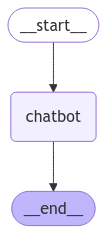

In [79]:
from IPython.display import Image, display      # 그래프 시각화

display(Image(graph.get_graph().draw_mermaid_png()))

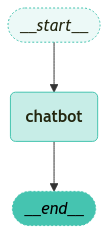

In [80]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph)

In [81]:
question = '대한민국 계엄령에 대해서 알려줘'

In [82]:
state = State(messages=[('user', question)])

for event in graph.stream(state):
    print('===================' * 20)
    print('[event]')
    print(event)
    print('===================' * 20)

1.chatbot() 실행
2.state[messages]: [HumanMessage(content='대한민국 계엄령에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='4fe00e92-5ef2-440a-8c47-83b931e07a10')]
3.chatbot answer: content='대한민국의 계엄령은 국가의 안전과 질서를 유지하기 위해 특정한 상황에서 군사력을 동원하여 시행되는 법적 조치입니다. 계엄령은 주로 전시, 내란, 또는 대규모 폭동과 같은 비상사태에 대응하기 위해 발동됩니다. 대한민국 헌법과 관련 법률에 따라 계엄령은 대통령의 명령에 의해 선포되며, 그 내용과 범위는 상황에 따라 달라질 수 있습니다.\n\n대한민국 역사에서 계엄령은 여러 차례 시행되었습니다. 가장 유명한 사례는 1970년대와 1980년대의 군사 정권 시절입니다. 특히 1980년 5월 광주민주화운동 당시 계엄령이 발동되었고, 이로 인해 많은 인명 피해와 인권 침해가 발생했습니다. 이 사건은 한국 현대사에서 중요한 전환점이 되었으며, 이후 민주화 운동과 정치적 변화의 계기가 되었습니다.\n\n계엄령의 발동은 국민의 기본권을 제한할 수 있기 때문에, 그 정당성과 필요성에 대한 논란이 항상 존재합니다. 따라서 계엄령의 시행은 법적, 정치적, 사회적 측면에서 신중하게 다루어져야 합니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 278, 'prompt_tokens': 16, 'total_tokens': 294, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio

In [86]:
state = State(messages=[('user', question)])

for event in graph.stream(state):
    print('===================' * 20)
    print('[event]')

    for k, value in event.items():
        print(f'노드 이름: {k}')
        print('===================' * 20)
        print(f"assistant 답변: ")
        print(f"{value['messages'][-1].content}")

    print('===================' * 20)

1.chatbot() 실행
2.state[messages]: [HumanMessage(content='대한민국 계엄령에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='1dcecc6d-5d27-4198-910f-ad5d7d70832b')]
3.chatbot answer: content='대한민국의 계엄령은 국가의 안전과 질서를 유지하기 위해 특정한 상황에서 군사력을 동원하여 법률의 일부 또는 전부를 정지시키고, 군사적 통제를 시행하는 제도입니다. 계엄령은 주로 전쟁, 내란, 대규모 폭동 등과 같은 비상사태에 대응하기 위해 선언됩니다.\n\n대한민국 역사에서 계엄령은 여러 차례 시행되었습니다. 가장 유명한 사례는 1970년대의 유신체제와 관련된 계엄령입니다. 1972년 박정희 대통령은 유신헌법을 통해 계엄령을 선포하고, 이를 통해 권력을 강화했습니다. 이 시기에 언론 통제와 정치적 억압이 심화되었고, 민주화 운동이 활발히 일어났습니다.\n\n또한, 1980년 광주 민주화 운동 당시에도 계엄령이 발동되어 군이 광주 지역에 투입되었고, 이로 인해 많은 인명 피해가 발생했습니다. 이 사건은 이후 한국 사회에서 민주화 운동의 상징적인 사건으로 기억되고 있습니다.\n\n계엄령은 헌법에 의해 규정되어 있으며, 대통령이 국회의 동의를 얻어 발동할 수 있습니다. 그러나 계엄령의 남용은 민주주의와 인권에 대한 심각한 위협이 될 수 있기 때문에, 그 시행과 관련된 법적, 정치적 논의가 지속적으로 이루어지고 있습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 319, 'prompt_tokens': 16, 'total_tokens': 335, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning

In [87]:
question = '대한민국 계엄령에 대해서 알려줘'

# state = State(messages=[('user', question)])

for event in graph.stream({'messages': [('user', question)]}):
    for k, value in event.items():
        print(f'노드 이름: {k}')
        print('===================' * 20)
        print(f"assistant: {value['messages'][-1].content}")

1.chatbot() 실행
2.state[messages]: [HumanMessage(content='대한민국 계엄령에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='84038554-4d4a-49c2-9cab-df463016c7d8')]
3.chatbot answer: content='대한민국의 계엄령은 국가의 안전과 질서를 유지하기 위해 특정한 상황에서 군사력을 동원하여 시행되는 법적 조치입니다. 계엄령은 주로 전시, 내란, 또는 대규모 폭동과 같은 비상사태에 대응하기 위해 발동됩니다. 대한민국 헌법과 관련 법률에 따라 계엄령은 대통령의 명령으로 발동되며, 그 내용과 범위는 상황에 따라 달라질 수 있습니다.\n\n대한민국 역사에서 계엄령은 여러 차례 시행되었습니다. 가장 유명한 사례 중 하나는 1980년 광주 민주화 운동과 관련된 계엄령입니다. 당시 정부는 광주에서 발생한 시위에 대해 군을 동원하여 강경 진압을 하였고, 이 과정에서 많은 인명 피해가 발생했습니다. 이 사건은 이후 한국 사회에서 민주화 운동의 상징적인 사건으로 기억되고 있습니다.\n\n계엄령은 국가의 안전을 위한 조치로 이해될 수 있지만, 동시에 개인의 자유와 권리를 제한할 수 있는 위험성을 내포하고 있습니다. 따라서 계엄령의 발동과 그 집행은 항상 사회적 논란과 비판의 대상이 되어 왔습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 264, 'prompt_tokens': 16, 'total_tokens': 280, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'aud